In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
mp_key = "bw9PJDXW6ljZz8DyLmXT49ZnMengQUwm"
mp_id = "mp-30460"

In [3]:
with MPRester(mp_key) as m:
    #récupération de la structure
    struct = m.get_structure_by_material_id(mp_id)
    #récupération de la structure de bande de phonons
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

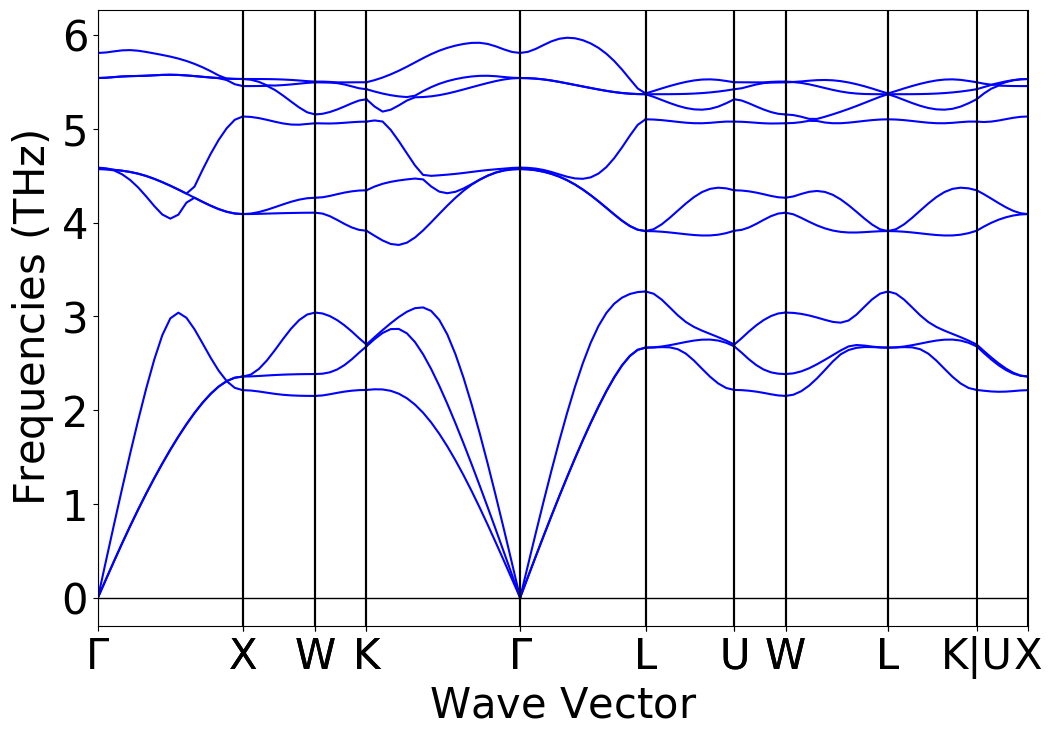

In [4]:
# visualisation de la structure de bande de phonons
bsplotter = PhononBSPlotter(ph_bs)
bsplotter.show()

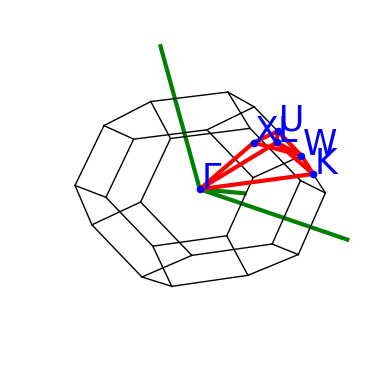

In [5]:
#zone de Brillouin
bsplotter.plot_brillouin()

Les branches acoustiques sont celles qui ont une fréquence nulle (w=0) au centre de la zone de Brillouin (point $\Gamma$).
On a donc des branches acoustiques dans les directions $\Gamma$ - $X$, $\Gamma$ - $K$ et $\Gamma$ - $L$.

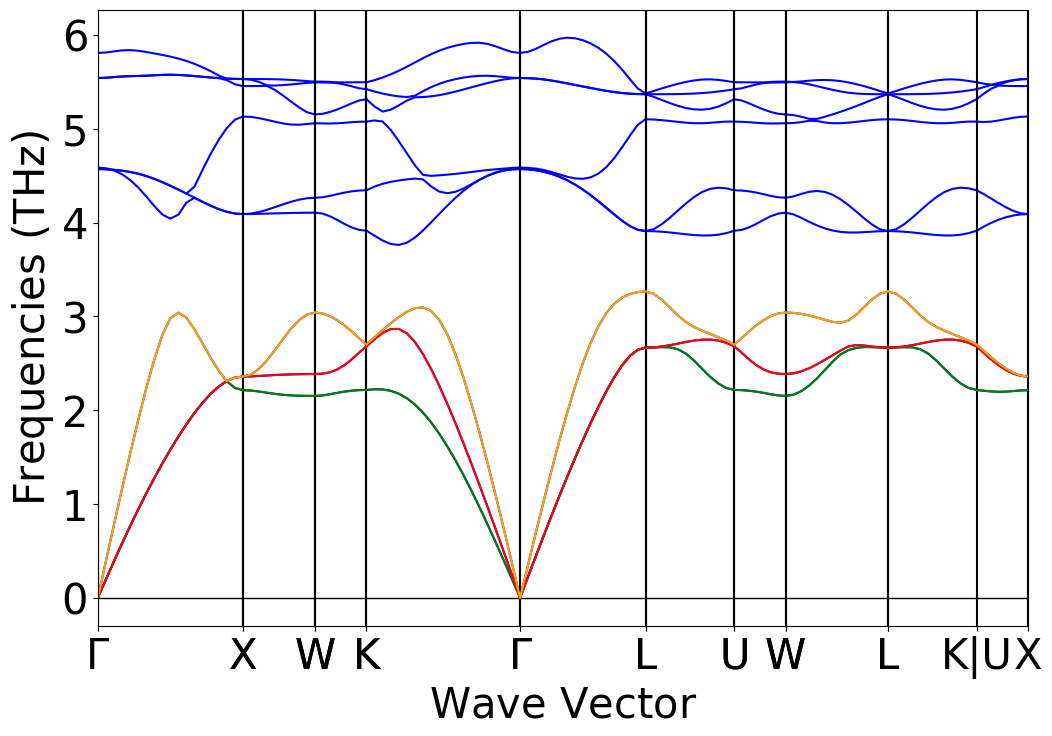

In [6]:
# Affichage des trois branches acoustiques différentes pour lesquelles la vitesse du son sera calculée
bsplotter.get_plot()
data = bsplotter.bs_plot_data() 
dist = data.get("distances")
freq = data.get("frequency")
for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], 'green')
    plt.plot(dist[i], freq[i][1], 'red')
    plt.plot(dist[i], freq[i][2], 'orange')

Pour de grandes longueurs d'onde (c'est à dire q qui tend vers 0) et w proche de 0, on a que la vitesse du son = dw/dq.
On va donc regarder la pente des branches acoustiques lorsque l'on est proche de w=0.

Il faut faire attention que les vecteurs d'ondes sont donnée en angstrom et que la relation liant la fréquence et la pulsation est w = 2 * pi * f

In [7]:
# Définition de l'angström
ang = 10**(-10)

#direction gamma-X pour la branche en vert d'indice 0
x00 = dist[0][0]/ang
x01 = dist[0][1]/ang
y00 = 2*np.pi*freq[0][0][0]*10**(12)  #conversion des THz en Hz
y01 = 2*np.pi*freq[0][0][1]*10**(12)

vs0 = abs((y01-y00)/(x01-x00))
print("La vitesse du son pour la première branche dans la direction gamme-X vaut", vs0, "m/s.\n")

#direction gamme-K pour la branche en rouge d'indice 1
x10 = dist[3][-1]/ang
x11 = dist[3][-2]/ang
y10 = 2*np.pi*freq[3][1][-1]*10**(12)  #conversion des THz en Hz
y11 = 2*np.pi*freq[3][1][-2]*10**(12)

vs1 = abs((y11-y10)/(x11-x10))
print("La vitesse du son pour la deuxième branche dans la direction gamme-K vaut", vs1, "m/s.\n")


#direction gamma-L pour la branche en jaune d'indice 2
x20 = dist[4][0]/ang
x21 = dist[4][1]/ang
y20 = 2*np.pi*freq[4][2][0]*10**(12)  #conversion des THz en Hz
y21 = 2*np.pi*freq[4][2][1]*10**(12)

vs2 = abs((y21-y20)/(x21-x20))
print("La vitesse du son pour la troisième branche dans la direction gamme-L vaut", vs2, "m/s.\n")


La vitesse du son pour la première branche dans la direction gamme-X vaut 2251.416547638249 m/s.

La vitesse du son pour la deuxième branche dans la direction gamme-K vaut 2783.789085770923 m/s.

La vitesse du son pour la troisième branche dans la direction gamme-L vaut 4095.555202467889 m/s.

